<a href="https://colab.research.google.com/github/Litzu10/python1/blob/master/CNN_HW0405.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **1. 讀入 Fashion MNSIT 數據集**

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# **2.欣賞數據及內容**

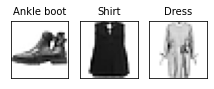

In [6]:
pick = np.random.choice(60000, 3, replace=False)

for i in range(3):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')  

In [7]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train.reshape(60000, 28,28,1)/255
x_test = x_test.reshape(10000, 28,28,1)/255

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

讀入必要的函式

In [0]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

# **3.打造函數學習機(CNN)**

In [0]:
model = Sequential()

#### 調整Conv2D裡的數量

In [0]:
model.add(Conv2D(8, (3,3), padding='same', 
                 input_shape=(28,28,1), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#### 將神經元數量改為30

In [0]:
model.add(Flatten())
model.add(Dense(30,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          1

#### 調整learning rate

In [0]:
model.compile(loss='mse', optimizer=SGD(lr=0.09), metrics=['accuracy'])

#### 調整batch_size和訓練次數，訓練多次一點，希望達到較高的準確率。

In [17]:
final = model.fit(x_train, y_train, batch_size=100, epochs=60)

Epoch 1/60
600/600 [==============================] - 27s 45ms/step - loss: 0.0898 - accuracy: 0.1771
Epoch 2/60
600/600 [==============================] - 27s 46ms/step - loss: 0.0889 - accuracy: 0.2844
Epoch 3/60
600/600 [==============================] - 27s 45ms/step - loss: 0.0840 - accuracy: 0.3093
Epoch 4/60
600/600 [==============================] - 27s 45ms/step - loss: 0.0562 - accuracy: 0.5712
Epoch 5/60
600/600 [==============================] - 27s 45ms/step - loss: 0.0401 - accuracy: 0.7065
Epoch 6/60
600/600 [==============================] - 27s 45ms/step - loss: 0.0361 - accuracy: 0.7401
Epoch 7/60
600/600 [==============================] - 27s 46ms/step - loss: 0.0334 - accuracy: 0.7617
Epoch 8/60
600/600 [==============================] - 27s 45ms/step - loss: 0.0318 - accuracy: 0.7763
Epoch 9/60
600/600 [==============================] - 27s 45ms/step - loss: 0.0303 - accuracy: 0.7871
Epoch 10/60
600/600 [==============================] - 27s 45ms/step - loss: 0.029

## **來看看結果！**

In [18]:
result = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
def my_predict(n):
  print ('My prediction is', class_names[result[n]])
  x = x_test[n].reshape(28,28)
  plt.imshow(x, cmap='Greys')

My prediction is Trouser


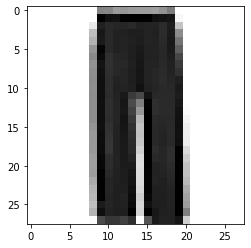

In [27]:
my_predict(9832)

In [21]:
from ipywidgets import interact_manual
interact_manual(my_predict, n=(0,9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict>

In [22]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0178 - accuracy: 0.8777


In [0]:
loss, acc = score

In [0]:
print('Accurancy = ', '%.2f' % acc) #印出預測正確率

Accurancy =  0.87


### 畫出預測正確率的變化

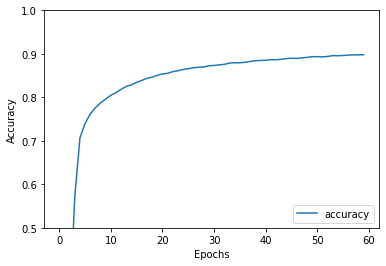

In [25]:
plt.plot(final.history['accuracy'], label='accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')